In [18]:
import h5py
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [19]:
n_sig = 3000

# File names
file_hlv = '/home/users/o/oleksiyu/WORK/hyperproject/workspaces/2024_09_09/TRANSITv1_HLV/template/outputs/template_sample_con.h5'
file_llv = '/home/users/o/oleksiyu/WORK/hyperproject/user/llv_hlv_templates/TRANSIT_LLV_v2_0cst.h5'

file_input = "/srv/beegfs/scratch/groups/rodem/LHCO/lowlevel_bkg_blank.h5"


In [20]:
import pyrootutils
import os
root = pyrootutils.setup_root(search_from=os.path.abspath(''), pythonpath=True, cwd=True, indicator=".project-root")
from libs_snap.anomdiff.src.datamodules.cnst_lhco import load_data, train_valid_split, get_cut_mask

In [21]:
hlv1, hlv2, jet1, jet2, _label, mjj = load_data(file_input, mjj_window=[3300, 3700])


In [22]:
#hlv1_gen, hlv2_gen, jet1_gen, jet2_gen, _label, mjj_gen = load_data(file_tem)

In [23]:
hlv_gen_df = pd.read_hdf(file_hlv)
hlv_gen_df.head()
print(len(hlv_gen_df))

983255


In [24]:
mjj_add = hlv_gen_df['mjj']
hlv1_gen = hlv_gen_df[['pt1', 'eta1', 'phi1', 'm1', 'Ncons1']]
hlv2_gen = hlv_gen_df[['pt2', 'eta2', 'phi2', 'm2', 'Ncons2']]
hlv1_gen["Ncons1"] = np.round(hlv1_gen["Ncons1"]) 
hlv2_gen["Ncons2"] = np.round(hlv2_gen["Ncons2"]) 


/tmp/ipykernel_2313461/1047336563.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hlv1_gen["Ncons1"] = np.round(hlv1_gen["Ncons1"])
/tmp/ipykernel_2313461/1047336563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hlv2_gen["Ncons2"] = np.round(hlv2_gen["Ncons2"])


In [25]:
hdf = h5py.File(file_llv, 'r')
# List all groups and datasets in the file
print("Keys: %s" % list(hdf.keys()))

# Access a specific dataset by key
dataset1 = hdf['jet1_locals']
dataset2 = hdf['jet2_locals']

# Convert to a numpy array (optional)
jet1_gen = dataset1[:]
jet2_gen = dataset2[:]



Keys: ['hlv1', 'hlv2', 'jet1_locals', 'jet2_locals', 'mjj']


In [26]:
print(hlv1_gen.head())
print(hlv1[:5])

           pt1      eta1      phi1          m1  Ncons1
0  1791.491455 -0.497463 -1.523130   86.738235    24.0
1  1557.892578  0.218501  1.401266  229.927048    70.0
2  1441.246704  0.018925  1.482280   58.972488    38.0
3  1522.315796  0.760745 -2.183590  119.039764    47.0
4  1292.712524  0.935567 -2.974176   75.615143    21.0
[[ 1.5895725e+03  3.1623673e-01  2.7467144e+00  3.8896030e+01
   1.4000000e+01]
 [ 1.5208230e+03 -8.4694302e-01 -2.5723319e+00  7.2038307e+01
   3.1000000e+01]
 [ 1.3213701e+03 -4.8565730e-02  4.3851709e-01  1.4616579e+02
   6.1000000e+01]
 [ 1.3607496e+03  1.2946745e+00  2.1024969e+00  4.6582547e+02
   5.3000000e+01]
 [ 1.4397058e+03  5.2819461e-01  6.4141989e-01  5.3384833e+02
   7.7000000e+01]]


In [27]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

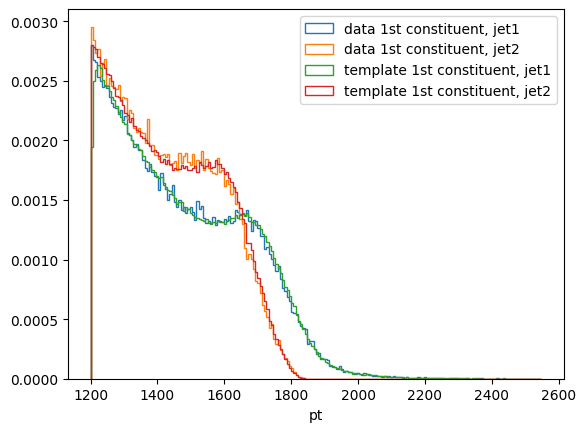

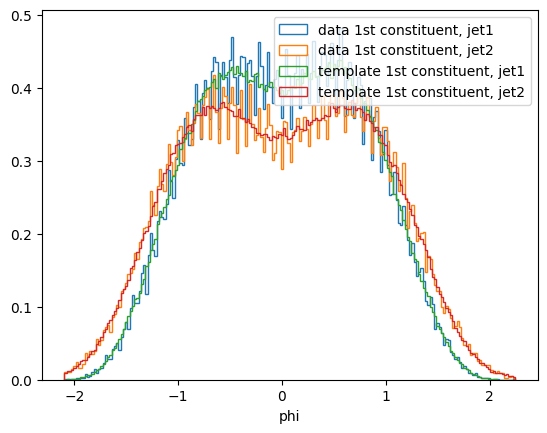

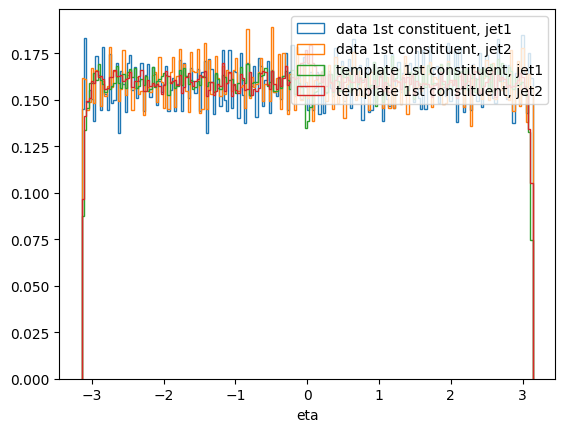

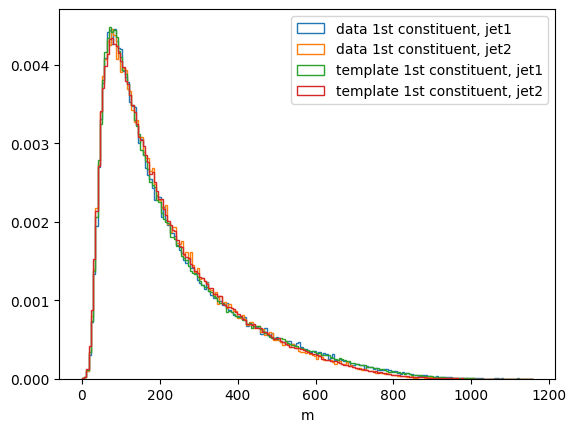

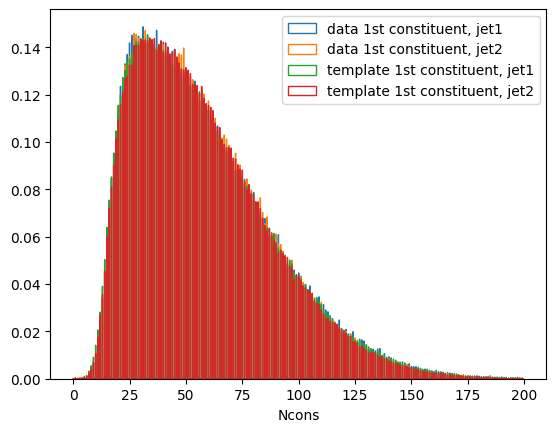

In [28]:
def plot_compare_hlv(varid, varid_gen1, varid_gen2, varname='x', constituents=1, bins=None):
    _, bins, _ = plt.hist(hlv1[:, varid], bins=bins, label = "data 1st constituent, jet1", density=True, histtype='step')
    plt.hist(hlv2[:, varid], bins=bins, label = "data 1st constituent, jet2", density=True, histtype='step')
    plt.hist(hlv1_gen[varid_gen1], bins=bins, label = "template 1st constituent, jet1", density=True, histtype='step')
    plt.hist(hlv2_gen[varid_gen2], bins=bins, label = "template 1st constituent, jet2", density=True, histtype='step')
    plt.legend(loc='upper right')
    plt.xlabel(varname)
    
plot_compare_hlv(0, 'pt1', 'pt2', 'pt', bins=200)
plt.figure()
plot_compare_hlv(1, 'eta1', 'eta2', 'phi', bins=200)
plt.figure()
plot_compare_hlv(2, 'phi1', 'phi2', 'eta', bins=200)
plt.figure()
plot_compare_hlv(3, 'm1', 'm2', 'm', bins=200)
plt.figure()
plot_compare_hlv(4, 'Ncons1', 'Ncons2', 'Ncons', bins=np.arange(2000)/10-0.05)

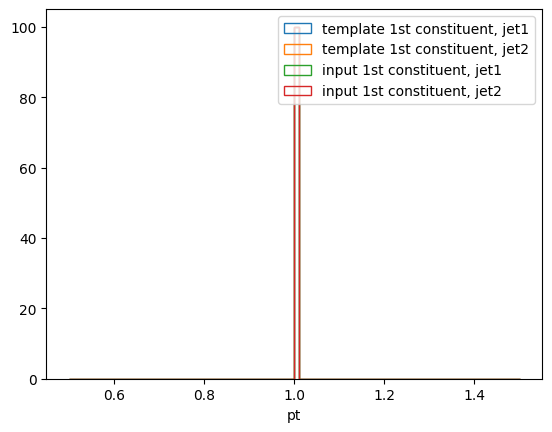

In [29]:
def plot_compare(varid, varname='x', constituents=1):
    _, bins, _ = plt.hist(jet1_gen[:, :constituents, varid], bins=100, label = "template 1st constituent, jet1", density=True, histtype='step')
    plt.hist(jet2_gen[:, :constituents, varid], bins=bins, label = "template 1st constituent, jet2", density=True, histtype='step')
    plt.hist(jet1[:, :constituents, varid], bins=bins, label = "input 1st constituent, jet1", density=True, histtype='step')
    plt.hist(jet2[:, :constituents, varid], bins=bins, label = "input 1st constituent, jet2", density=True, histtype='step')
    plt.legend(loc='upper right')
    plt.xlabel(varname)  

plot_compare(0, 'pt')


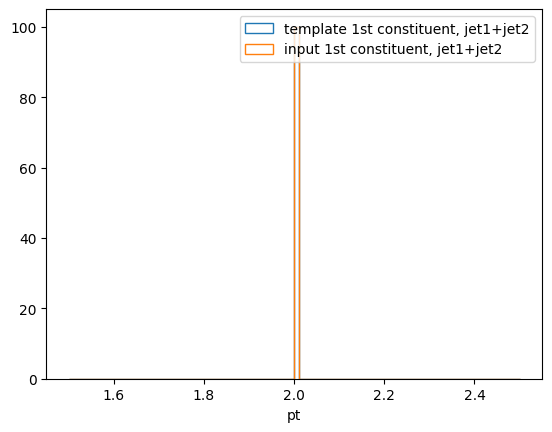

In [30]:
def plot_compare_sum(varid, varname='x'):
    _, bins, _ = plt.hist(jet1_gen[:, 0, varid]+jet2_gen[:, 0, varid], bins=100, label = "template 1st constituent, jet1+jet2", density=True, histtype='step')
    plt.hist(jet1[:, 0, varid]+jet2[:, 0, varid], bins=bins, label = "input 1st constituent, jet1+jet2", density=True, histtype='step')
    plt.legend(loc='upper right')
    plt.xlabel(varname)  

plot_compare_sum(0, 'pt')

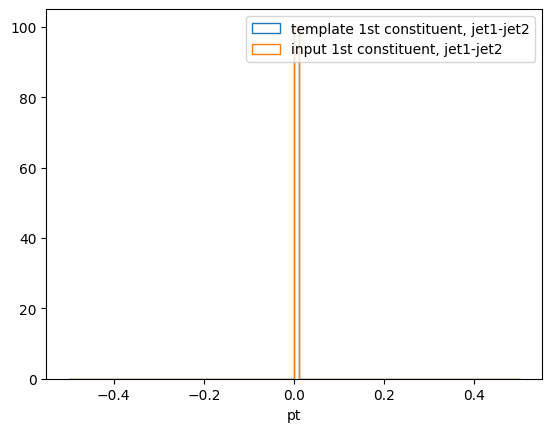

In [31]:
def plot_compare_diff(varid, varname='x'):
    _, bins, _ = plt.hist(jet1_gen[:, 0, varid]-jet2_gen[:, 0, varid], bins=100, label = "template 1st constituent, jet1-jet2", density=True, histtype='step')
    plt.hist(jet1[:, 0, varid]-jet2[:, 0, varid], bins=bins, label = "input 1st constituent, jet1-jet2", density=True, histtype='step')
    plt.legend(loc='upper right')
    plt.xlabel(varname)  

plot_compare_diff(0, 'pt')

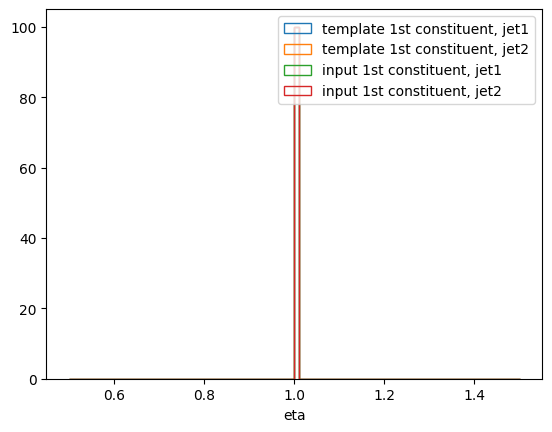

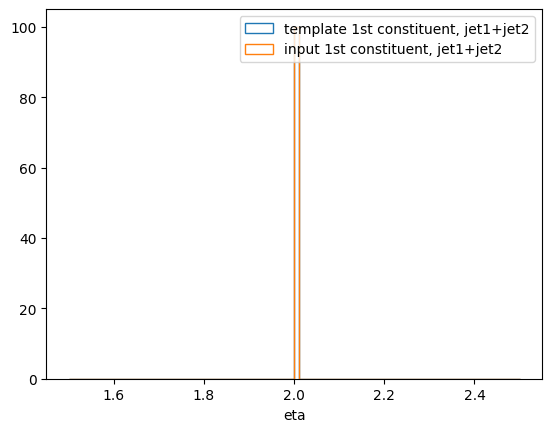

In [32]:
plot_compare(1, 'eta')
plt.figure()
plot_compare_sum(1, 'eta')

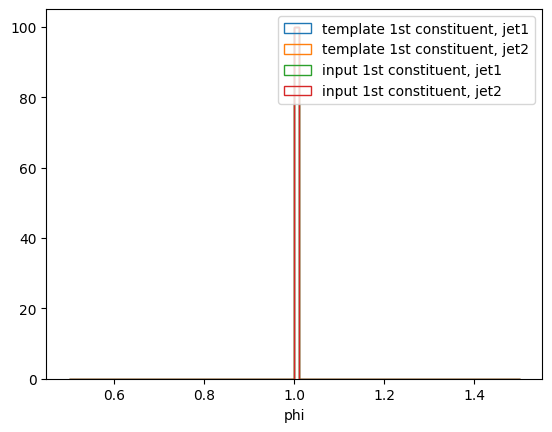

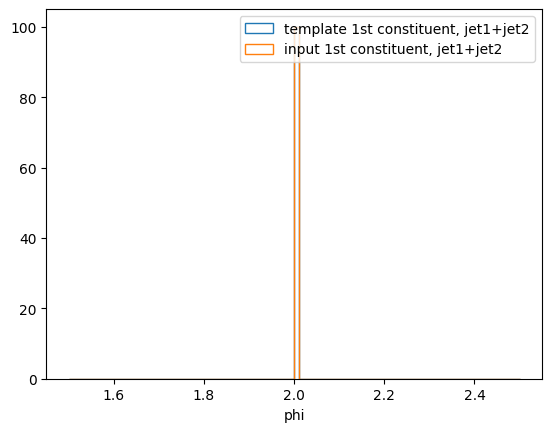

In [33]:
plot_compare(2, 'phi')
plt.figure()
plot_compare_sum(2, 'phi')
